# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Frankie Rizky Stevent
- **Email:** frankierizky@gmail.com
- **ID Dicoding:** frankie29

## Menentukan Pertanyaan Bisnis

1.   Bagaimana data pembelian setiap bulan?
2.   Berapa tingkat kepuasan pembeli terhadap layanan?
3.   Produk apa dengan jumlah pembelian terbesar?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import datetime as dt
import os
from unidecode import unidecode

## Data Wrangling

### Gathering Data

In [3]:
# melakukan download zip dataset dari link yang diberikan
!gdown 'https://drive.google.com/uc?export=download&id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?export=download&id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=6dd4504e-6d0a-426c-8c81-d3a510573119
To: /content/E-commerce-public-dataset.zip
100% 44.9M/44.9M [00:00<00:00, 117MB/s]


In [4]:
# Path file zip
zip_file_path = '/content/E-commerce-public-dataset.zip'

# Lokasi direktori untuk ekstraksi
extract_dir = '/content/'

# Ekstrak file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Merename folder
os.rename('/content/E-Commerce Public Dataset', '/content/datasets')

# Menghapus file
os.remove('/content/datasets/New Text Document.txt')

# Cek apakah folder berhasil diubah namanya
os.listdir('/content/')

['.config', 'datasets', 'E-commerce-public-dataset.zip', 'sample_data']

In [5]:
#Cek data pada folder datasets
df_customers=pd.read_csv('/content/datasets/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
#Cek data pada folder datasets
df_geolocation=pd.read_csv('/content/datasets/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
#Cek data pada folder datasets
df_order_items=pd.read_csv('/content/datasets/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
#Cek data pada folder datasets
df_order_payment=pd.read_csv('/content/datasets/order_payments_dataset.csv')
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
#Cek data pada folder datasets
df_order_reviews=pd.read_csv('/content/datasets/order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
#Cek data pada folder datasets
df_orders=pd.read_csv('/content/datasets/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
#Cek data pada folder datasets
df_product_category=pd.read_csv('/content/datasets/product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
#Cek data pada folder datasets
df_products=pd.read_csv('/content/datasets/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
#Cek data pada folder datasets
df_sellers=pd.read_csv('/content/datasets/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data yang tersedia sudah lengkap
- Data yang tersedia dapat diolah

### Assessing Data

In [14]:
df_products.info()
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

In [15]:
df_order_items.info()
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 

In [16]:
df_order_reviews.info()
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status    

In [17]:
df_products.info()
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0 

In [18]:
df_product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
#Cek Data Null
df_customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [20]:
#Cek Data Null
df_geolocation.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [21]:
#Cek Data Null
df_order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [22]:
#Cek Data Null
df_order_payment.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [23]:
#Cek Data Null
df_order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [24]:
#Cek Data Null
df_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [25]:
#Cek Data Null
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [26]:
#Cek Data Null
df_sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [27]:
#Cek Data Null
df_product_category.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [28]:
#Cek Data Duplicated
print(f'total duplicate customers        = {df_customers.duplicated().sum()}\n'
      f'total duplicate geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'total duplicate order items      = {df_order_items.duplicated().sum()}\n'
      f'total duplicate order payment    = {df_order_payment.duplicated().sum()}\n'
      f'total duplicate order review     = {df_order_reviews.duplicated().sum()}\n'
      f'total duplicate order            = {df_orders.duplicated().sum()}\n'
      f'total duplicate products         = {df_products.duplicated().sum()}\n'
      f'total duplicate seller           = {df_sellers.duplicated().sum()}\n'
      f'total duplicate product category = {df_product_category.duplicated().sum()}\n'
      )

total duplicate customers        = 0
total duplicate geolocation      = 261831
total duplicate order items      = 0
total duplicate order payment    = 0
total duplicate order review     = 0
total duplicate order            = 0
total duplicate products         = 0
total duplicate seller           = 0
total duplicate product category = 0



In [29]:
#Describe Data
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [30]:
#Describe Data
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [31]:
#Describe Data
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [32]:
#Describe Data
df_order_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [33]:
#Describe Data
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [34]:
#Describe Data
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [35]:
#Describe Data
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
#Describe Data
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [37]:
#Describe Data
df_product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Masih terdapat data null pada beberapa file
- Masih terdapat data yang terduplikasi

### Cleaning Data

In [38]:
#Mengubah Object/String Menjadi Tipe Data Datetime
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

order_item_col=['shipping_limit_date']
for col in order_item_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])

Menghapus Data Duplicate

In [39]:
df_geolocation.duplicated().sum()

261831

In [40]:
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.duplicated().sum()

0

In [41]:
#Cleaning Data Null
df_order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Mengubah Nilai Kolom review_comment_title & review_comment_message yang memiliki null value dengan default string "No Tittle" & "No Message"

In [42]:
'''Mengubah Nilai Kolom review_comment_title & review_comment_message yang
memiliki null value dengan default string "No Tittle" & "No Message" '''

df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)
df_order_reviews["review_comment_message"].fillna("No Message", inplace=True)
df_order_reviews.isna().sum()

<ipython-input-42-003417d8bc50>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)
<ipython-input-42-003417d8bc50>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Pada data order dan product saya tidak drop null value karena dapat menghilangkan keterangan data yang penting

In [43]:
df_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [44]:
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Data null sudah dilakukan pembersihan
- Data yang terduplikasi sudah dirapikan

## Exploratory Data Analysis (EDA)

### Explore datasets

Explore df_customers

In [45]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Untuk df_customer diketahui bahwa data ini memiliki nilai id yang unik

In [46]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [47]:
# Untuk mencari tahu asal kota customer
df_customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Explore df_geolocation

In [48]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


Terdapat text lokasi yang memiliki format berbeda, seperti pada sao paulo.sehingga perlu dilakukan perubahan format

In [49]:
(df_geolocation['geolocation_city']=='são paulo').sum()

19718

In [50]:
df_geolocation['geolocation_city']=df_geolocation['geolocation_city'].apply(lambda x: unidecode(x))

Format penulisan sao paulo sudah berhasil disamakan

In [51]:
(df_geolocation['geolocation_city']=='são paulo').sum()

0

Dapat dilihat letak demografis terbanyak berada di sao paulo

In [52]:
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6345,jordao,CE,1
6346,silves,AM,1
6347,california da barra (barra do pirai),RJ,1
6348,calheiros,RJ,1


In [53]:
df_order_payment.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


Merge df_customers & df_orders

In [54]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [55]:
cust_orders_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Merge df_products dengan df_product_category

In [56]:
new_df_products=pd.merge(
    left=df_products,
    right=df_product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

col = new_df_products.pop('product_category_name_english')
new_df_products.insert(2, col.name, col)
new_df_products.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [57]:
df_order_payment.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
36746,0e36a0363ee90aef2a9aed38aa46a2a2,1,credit_card,8,402.34
11556,8fe36dfd03ccfe3ed3d492c146705b9d,1,credit_card,3,111.22
30272,58f9ab98b542d84139dda631d9e257d5,1,credit_card,4,158.07
80878,520a0432269a88e8665d60d74918f8b5,1,credit_card,4,208.78
43539,eb662529b45921de69ee27ba4baefcac,1,boleto,1,63.29
66087,3b73af98e156e78b9589279586399d8e,1,credit_card,1,72.42
34706,6853ae5670c85a2bff0f46a53ab4c966,1,credit_card,2,118.70
42264,4fc42727f0b542099a7568206da01fa6,1,credit_card,5,100.34
35721,6174441865ff6d9fd4ef874995201e9e,1,credit_card,4,64.22
83057,46ee18d54b333b82bf3ade82ec553b5b,1,credit_card,4,80.00


In [58]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [59]:
m1=pd.merge(
    left=cust_orders_df,
    right=df_order_payment,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
m1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [60]:
m2=pd.merge(
    left=m1,
    right=df_order_items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
m2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [61]:
m3=pd.merge(
    left=m2,
    right=new_df_products,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
m3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [62]:
m4=pd.merge(
    left=m3,
    right=df_sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
m4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [63]:
pd.set_option('display.max_columns', None)

all_df=pd.merge(
    left=m4,
    right=df_order_reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,books_general

In [64]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118310.000000,118310,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,2018-01-05 22:06:13.308807680,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,2017-09-18 14:30:33,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,2018-01-25 04:11:15.500000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,2018-05-10 02:51:40.249999872,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,NaN,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


RFM

Dengan menganggap sekarang adalah 20 Okt 2018

In [65]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [66]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [67]:
#Y-M-D
now=dt.datetime(2018,10,20)
#now=dt.datetime(2018,9,3)

In [68]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [69]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,2,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50


In [70]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


Customer dengan Pengeluaran Terbesar

In [71]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,274,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,218,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,434,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,166,1,0.00


Customer dengan terakhir kali belanjanya

In [72]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


Customer dengan Pembelian Terbanyak

In [73]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,160,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,258,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,458,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,164,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,537,1,139.90


Melihat Jumlah Total Keuntungan Berdasarkan State pada Setiap Kategori

In [74]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

In [75]:
#melihat jumlah total keuntungan berdasarkan customer city pada setiap produk kategori
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

In [76]:
#melihat tingkat jumlah kepuasan pembeli terhadap layanan
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


In [77]:
all_df=pd.merge(
    left=all_df,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'
)

all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
90949,a86b2bcf75c0d9ef2fa4750bba90391a,9b52ae434fceca64d2342aa00e1d673b,7803,franco da rocha,SP,394643cd54739aad60aabc03272e28bb,delivered,2017-11-27 10:14:03,2017-11-27 10:35:18,2017-11-28 20:59:00,2017-12-06 16:49:43,2017-12-19,1.0,credit_card,8.0,164.12,2.0,769083fbf5eb9f3f132a633cc9809388,1b938a7ec6ac5061a66a3766e0e75f90,2017-12-05 10:30:49,64.90,17.16,cool_stuff,cool_stuff,58.0,1419.0,4.0,8333.0,59.0,31.0,75.0,16304.0,penapolis,SP,e1276329fd14851416e8feb48a527cd1,5.0,No Title,Perfeito,2017-12-07,2017-12-13 12:56:30,326,2,129.80
83117,b5672da69f806d8bc4eea831365f07da,9e651745bfd1fd007bed5a7053561a82,22021,rio de janeiro,RJ,8adb87b0bb81da96d28e6cfaa033a40d,delivered,2017-11-24 09:38:22,2017-11-24 10:56:54,2017-11-28 20:18:09,2017-12-12 18:41:55,2017-12-14,1.0,credit_card,1.0,89.17,1.0,b736d9a2b8c08167e109d209e97833e0,cab85505710c7cb9b720bceb52b01cee,2017-11-30 10:56:54,74.90,14.27,fashion_bolsas_e_acessorios,fashion_bags_accessories,24.0,485.0,4.0,200.0,16.0,12.0,16.0,2252.0,sao paulo,SP,da2fdcdea0e97bb7ed29ecd457d5bfdc,5.0,No Title,No Message,2017-12-13,2017-12-14 11:10:35,329,1,74.90
103532,61b5bd939044332625d8373f774a10b3,e6598b200124ba3d069678bd3b569475,52020,recife,PE,a3b2201d0e95f595df90c26c8dae015f,delivered,2018-01-12 19:43:25,2018-01-12 19:52:28,2018-01-16 22:21:35,2018-01-28 13:16:42,2018-02-07,1.0,credit_card,1.0,145.12,1.0,065554bfe0244b9f5f6414f332106a21,e62b2d6ac10570a035a30bafcf01d263,2018-01-18 19:52:28,54.90,17.66,flores,flowers,46.0,145.0,1.0,800.0,30.0,15.0,20.0,5767.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaT,NaT,280,2,109.80
87728,ac9333a0622593a2af3c26cbec36576c,78b47e917e6732e91b9fd5e23205b830,18145,sao roque,SP,67c2939389900ee5ef95296df8691336,delivered,2017-10-26 22:54:02,2017-10-26 23:06:07,2017-10-27 18:49:44,2017-10-31 21:28:59,2017-11-14,1.0,credit_card,4.0,53.55,1.0,6df3e292ba834323d4d8164d4c88e698,7a67c85e85bb2ce8582c35f2203ad736,2017-11-02 23:06:07,9.99,21.43,bebes,baby,50.0,524.0,1.0,250.0,23.0,14.0,28.0,3426.0,sao paulo,SP,3f2de81b62562b6567418b8e138e8b74,4.0,No Title,Eu sempre comprei com lannister. Com e nunca t...,2017-11-01,2017-11-02 00:30:34,358,2,29.98
33322,a1188e9345ab24476119f9fedd151813,865beeccce9e5e942d09075165302d8d,4551,sao paulo,SP,64cc5eadd86b15a6b38bddbeb61ef944,delivered,2017-11-24 16:40:20,2017-11-28 02:59:34,2017-12-01 19:09:07,2017-12-04 19:32:45,2017-12-08,1.0,boleto,1.0,25.78,1.0,e52ba7b3c98465f5b618ed526d399357,ef506c96320abeedfb894c34db06f478,2017-12-04 02:59:34,18.00,7.78,telefonia,telephony,52.0,303.0,2.0,150.0,19.0,4.0,11.0,3569.0,sao paulo,SP,ce4e0339d54350f7f1baf2b47c378dc4,5.0,No Title,No Message,2017-12-05,2017-12-08 18:31:16,329,1,18.00


In [78]:
all_df.to_csv('all_data.csv', index=False)

**Insight:**
- Terdapat text lokasi yang memiliki format berbeda, seperti pada sao paulo.sehingga perlu dilakukan perubahan format dan sudah berhasil disamakan
- Metode pembayaran terbanyak yaitu dengan menggunakan credit card
- Diperoleh Jumlah Total Keuntungan Berdasarkan State pada Setiap Kategori, Customer dengan Pembelian Terbanyak, dan sebagainya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana data pembelian setiap bulan?

In [79]:
monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

<ipython-input-79-52291251d1f3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({


,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,984
2017-02-28,2104
2017-03-31,3263
2017-04-30,2845
2017-05-31,4471


In [80]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [81]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,984
5,February,2104
6,March,3263
7,April,2845
8,May,4471
9,June,3863


In [82]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [83]:
monthly_df

,order_approved_at,order_count
12,September,5211
13,October,5630
15,December,6846
22,July,7234
21,June,7391
23,August,7672
17,February,8041
19,April,8075
20,May,8497
16,January,8541


In [84]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

monthly_df

,order_approved_at,order_count
16,January,8541
17,February,8041
18,March,8705
19,April,8075
20,May,8497
21,June,7391
22,July,7234
23,August,7672
12,September,5211
13,October,5630


In [85]:
monthly_df[monthly_df['order_count'] == monthly_df['order_count'].max()]['order_approved_at'].values[0]

'November'

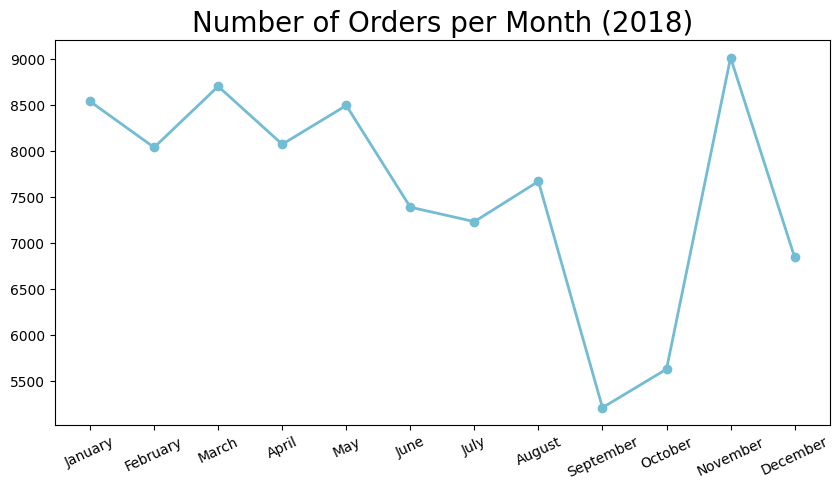

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

In [87]:
#Customer Spend
sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

sum_spend_df

<ipython-input-87-a74642df4ae6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,51201.31
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,124313.26
5,2017-02-28,262281.82
6,2017-03-31,394384.70
7,2017-04-30,390306.86
8,2017-05-31,550323.59
9,2017-06-30,461045.05


In [88]:
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')
sum_spend_df

,order_approved_at,total_spend
0,September,134.97
1,October,51201.31
2,November,0.00
3,December,10.90
4,January,124313.26
5,February,262281.82
6,March,394384.70
7,April,390306.86
8,May,550323.59
9,June,461045.05


In [89]:
sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
sum_spend_df

,order_approved_at,total_spend
12,September,654698.76
13,October,704026.32
15,December,795824.02
17,February,882417.57
22,July,908431.56
23,August,909806.29
21,June,914410.56
16,January,986284.61
19,April,1010481.51
14,November,1039022.61


In [90]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column based on the custom order
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical column
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Remove the 'month_cat' column if you don't need it
sorted_df = sorted_df.drop(columns=['month_cat'])

print(sorted_df)

   order_approved_at  total_spend
16           January    986284.61
17          February    882417.57
18             March   1039716.71
19             April   1010481.51
20               May   1056093.87
21              June    914410.56
22              July    908431.56
23            August    909806.29
12         September    654698.76
13           October    704026.32
14          November   1039022.61
15          December    795824.02


In [91]:
#total spend
sum_spend_df['total_spend'].sum()

10901214.39

In [92]:
#average spend
sum_spend_df['total_spend'].mean()

908434.5325000001

In [93]:
sum_spend_df

,order_approved_at,total_spend,month_cat
12,September,654698.76,September
13,October,704026.32,October
15,December,795824.02,December
17,February,882417.57,February
22,July,908431.56,July
23,August,909806.29,August
21,June,914410.56,June
16,January,986284.61,January
19,April,1010481.51,April
14,November,1039022.61,November


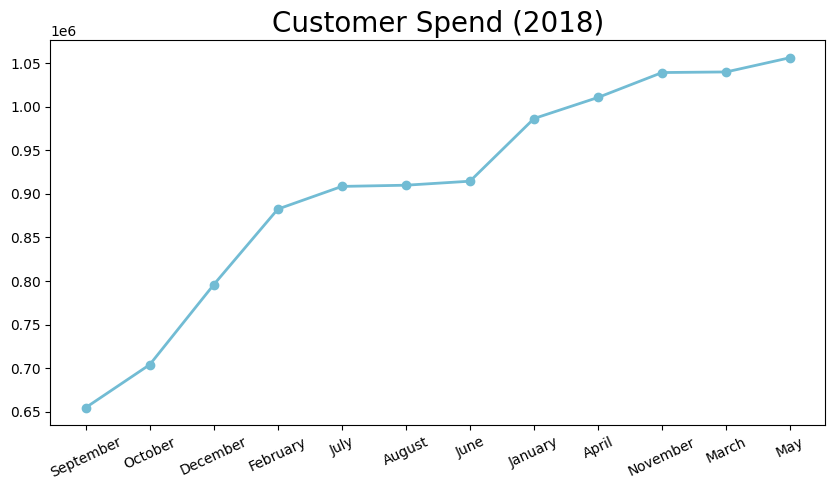

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_spend_df["order_approved_at"],
    sum_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Customer Spend (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Berapa tingkat kepuasan pembeli terhadap layanan?

In [95]:
# Rating Cutomer Terhadap Layanan
x=all_df['review_score'].value_counts().sort_values(ascending=False)
x.index

Index([5.0, 4.0, 1.0, 3.0, 2.0], dtype='float64', name='review_score')

In [96]:
x.values

array([66343, 22319, 15428,  9894,  4162])

<ipython-input-97-06754b1a09ae>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_service.index,


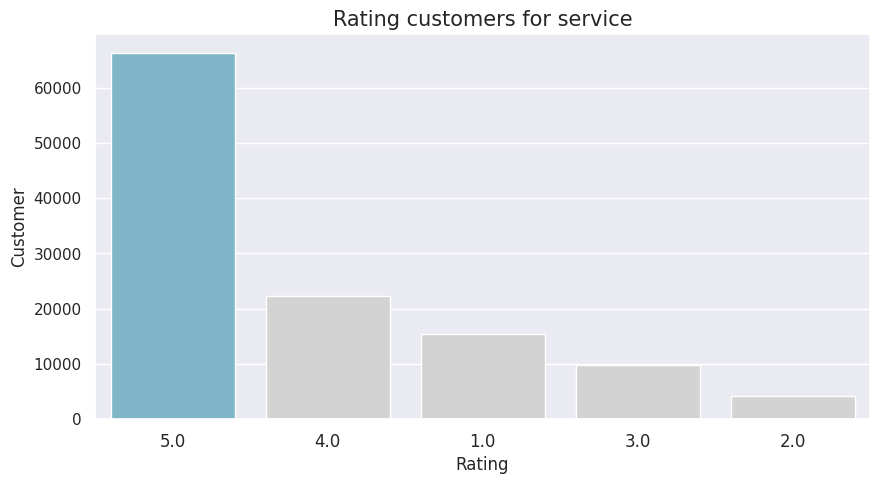

In [97]:
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_service.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

### Pertanyaan 3: Produk apa dengan jumlah pembelian terbesar?

In [98]:
#Penjualan Produk Terbanyak
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


<ipython-input-99-6d8ded24237a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
<ipython-input-99-6d8ded24237a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])


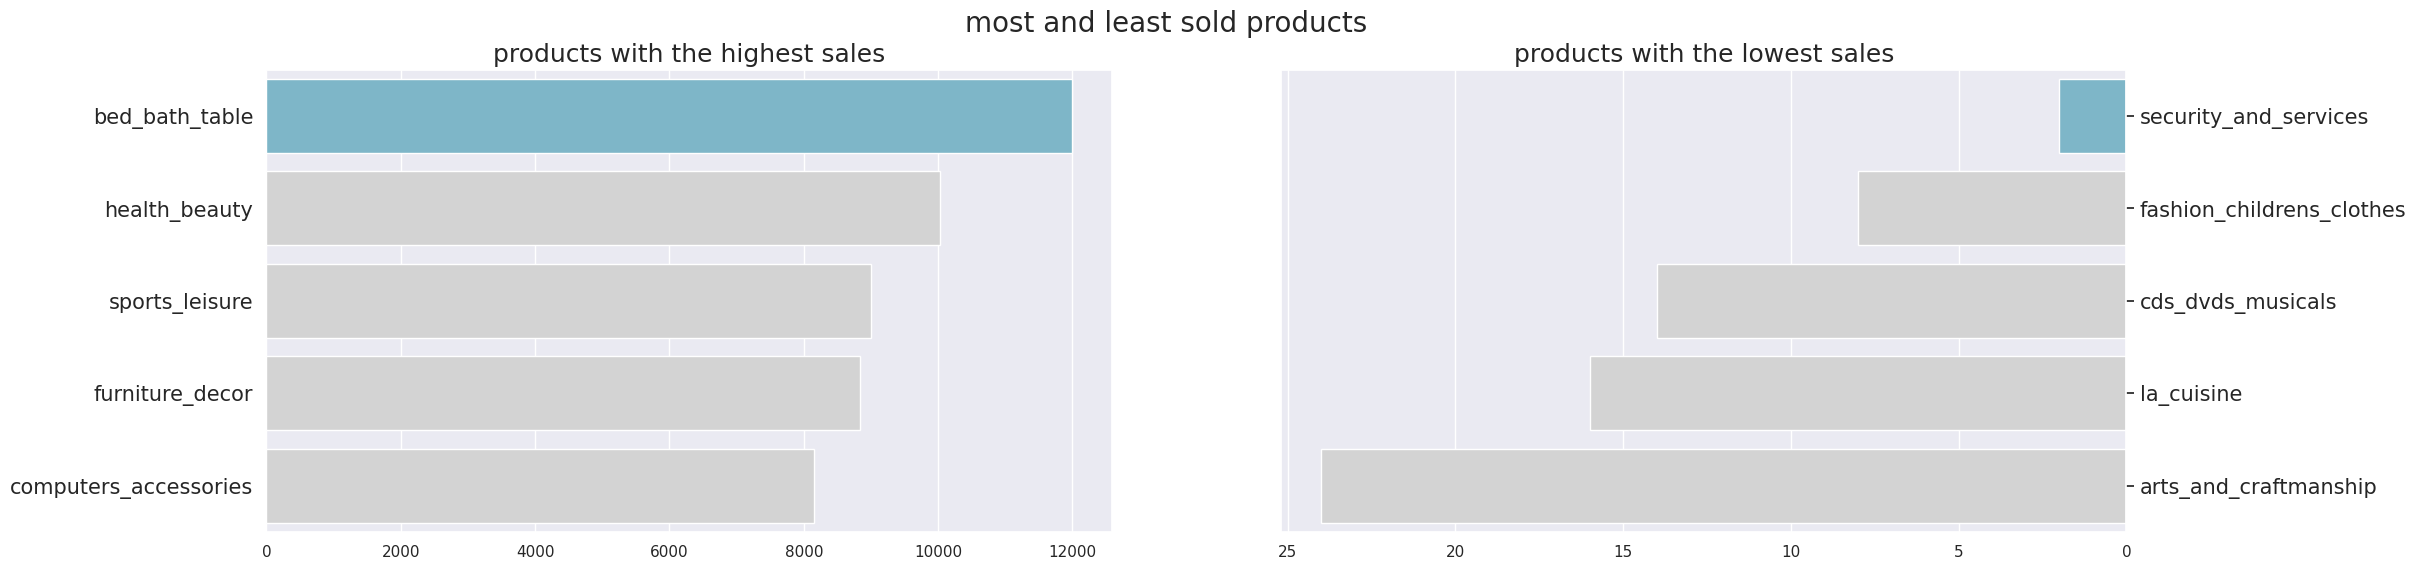

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
plt.show()

**Insight:**
- Diketahui data pembelian order setiap bulan
- Diketahui tingkat kepuasan pembeli terhadap layanan
- Diketahui Produk dengan jumlah pembelian terbesar

## Analisis Lanjutan
MELIHAT VISUALISASI RFM

R - RECENCY

F - FREQUENCY

M - MONETARY

In [100]:
rfm

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,339,1,89.80
1,000161a058600d5901f007fab4c27140,460,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,598,1,179.99
3,0002414f95344307404f0ace7a26f1d5,429,1,149.90
4,000379cdec625522490c315e70c7a9fb,200,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,204,3,164.70
99437,fffeda5b6d849fbd39689bb92087f431,150,1,47.90
99438,ffff42319e9b2d713724ae527742af25,128,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,412,2,21.80


In [101]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


<ipython-input-102-a571d042e0d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-102-a571d042e0d1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-102-a571d042e0d1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-102-a571d042e0d1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

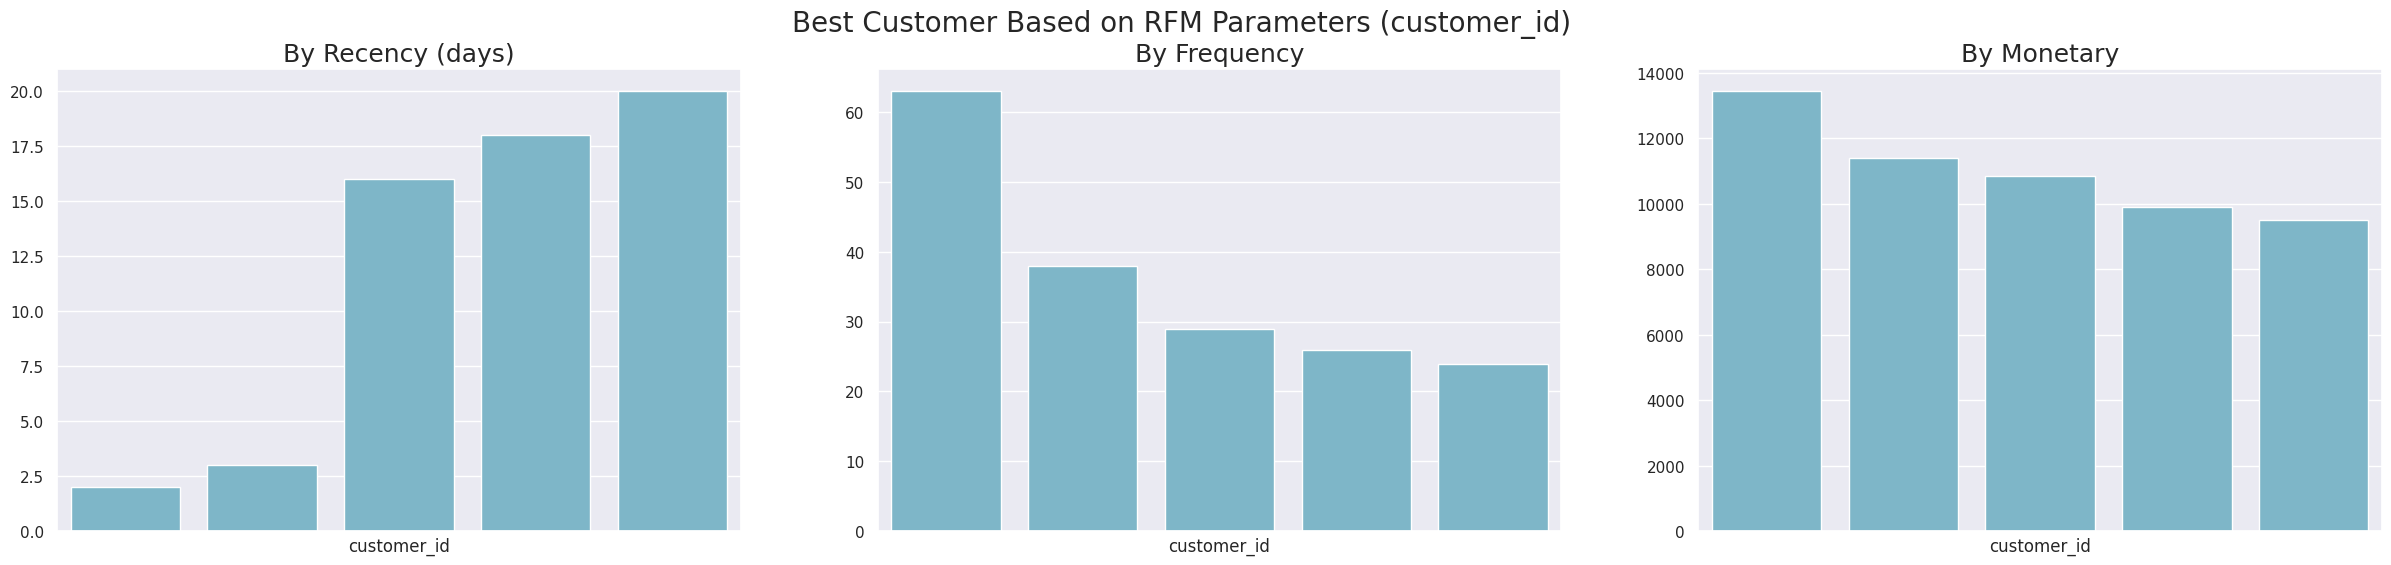

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# beri comentar pada ax[index].set_xticks([]) bila ingin melihat customer nya by id


sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

**1. Bagaimana data pembelian order setiap bulan?**

Data pembelian customer bernilai **fluaktif**,dengan kata lain nilai dari pembelian customer setiap bulan ada kenaikan dan terkadang ada penurunan,yang dimana berdasarkan data terkait **puncak pembelian maksimum customer** ada pada bulan **November** dan **puncak pembelian minimum customer** ada pada bulan **September**.

**2. Berapa tingkat kepuasan pembeli terhadap layanan?**

**Tingkat Kepuasan sebagian Customer memuaskan**,hal ini dapat dibuktikan berdasarkan data yang divisualisasikan,nilai rating pada kebanyakan customer berikan pada nilai sempurna,yakni nilai 5,dengan nilai rata-rata diangka 4 jika dibulatkan

**3. Produk apa dengan jumlah pembelian terbesar?**

Berdasarkan data yang divisualisasikan,pembelian customer terbesar ada pada produk **beth_bad_table** dan pembelian produk terkecil pada **security_and_service**.